<a href="https://colab.research.google.com/github/SafaaFathii/The-Sparks-Foundation-Tasks-Data-Science-/blob/main/notebooks/The_Sparks_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
sns.set()

In [23]:
DF_PATH = "https://raw.githubusercontent.com/SafaaFathii/The-Sparks-Foundation-Tasks-Data-Science-/main/src/data/Iris.csv?token=GHSAT0AAAAAABSMAAKQR2DL62AVRQMB6AS6YUZDGOA"

In [24]:
df = pd.read_csv(DF_PATH,index_col = "Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [26]:
distortions = []
K = range (1,11)
X = df.drop("Species",axis = 1)
y = df["Species"]
for k in K:
    KmeansModel = KMeans(n_clusters=k)
    KmeansModel.fit(X)
    distortions.append(KmeansModel.inertia_)


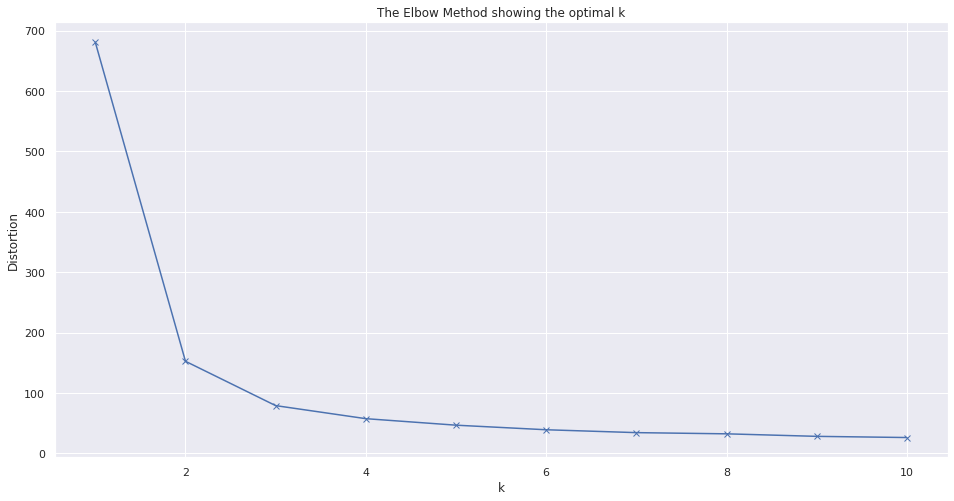

In [27]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)

KMeans(n_clusters=3)

In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species'])

In [40]:
df["Species"]

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

Text(0.5, 1.0, 'K_Means')

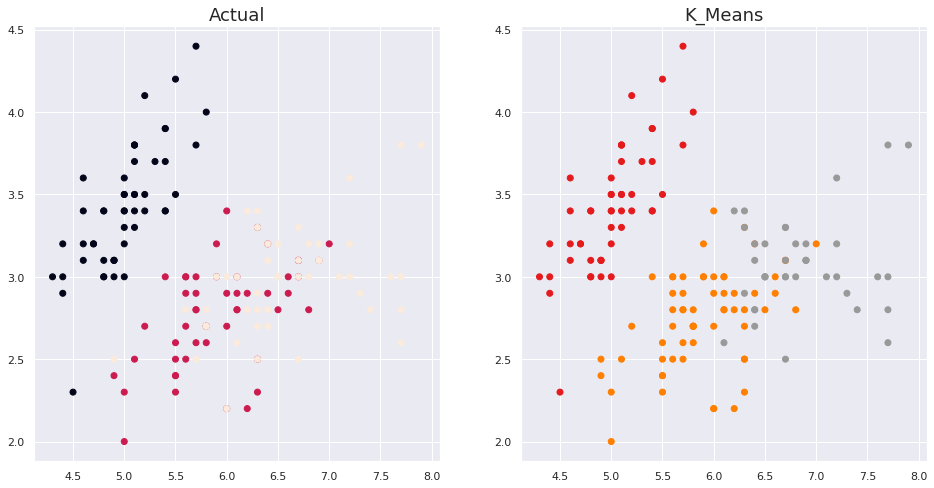

In [41]:
df['Y_Predict']=kmeanModel.predict(X)
#df['target']=iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df["SepalLengthCm"], df["SepalWidthCm"], c=df['Species'])
axes[1].scatter(df["SepalLengthCm"], df["SepalWidthCm"], c=df['Y_Predict'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)